In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [54]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [55]:
df.info

<bound method DataFrame.info of          Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]>

In [56]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

C:\Users\MSI\AppData\Local\Temp\ipykernel_20236\2018583449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Category'], palette='tab20')  # Colorful bars


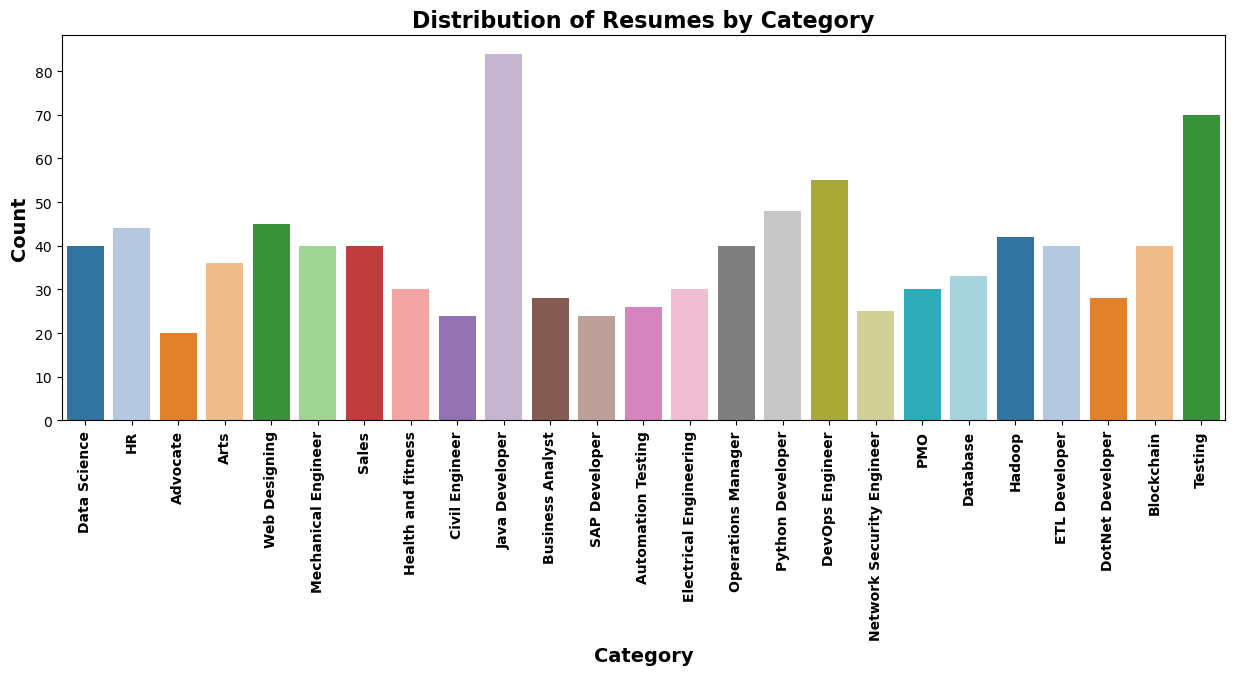

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Category'], palette='tab20')  # Colorful bars

# Rotate x-axis labels, make them black and bold
labels = plt.gca().get_xticklabels()
for label in labels:
    label.set_color('black')      # Set label color to black
    label.set_fontweight('bold')  # Make label bold

plt.xticks(rotation=90)
plt.xlabel("Category", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.title("Distribution of Resumes by Category", fontsize=16, fontweight='bold')
plt.show()

In [58]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

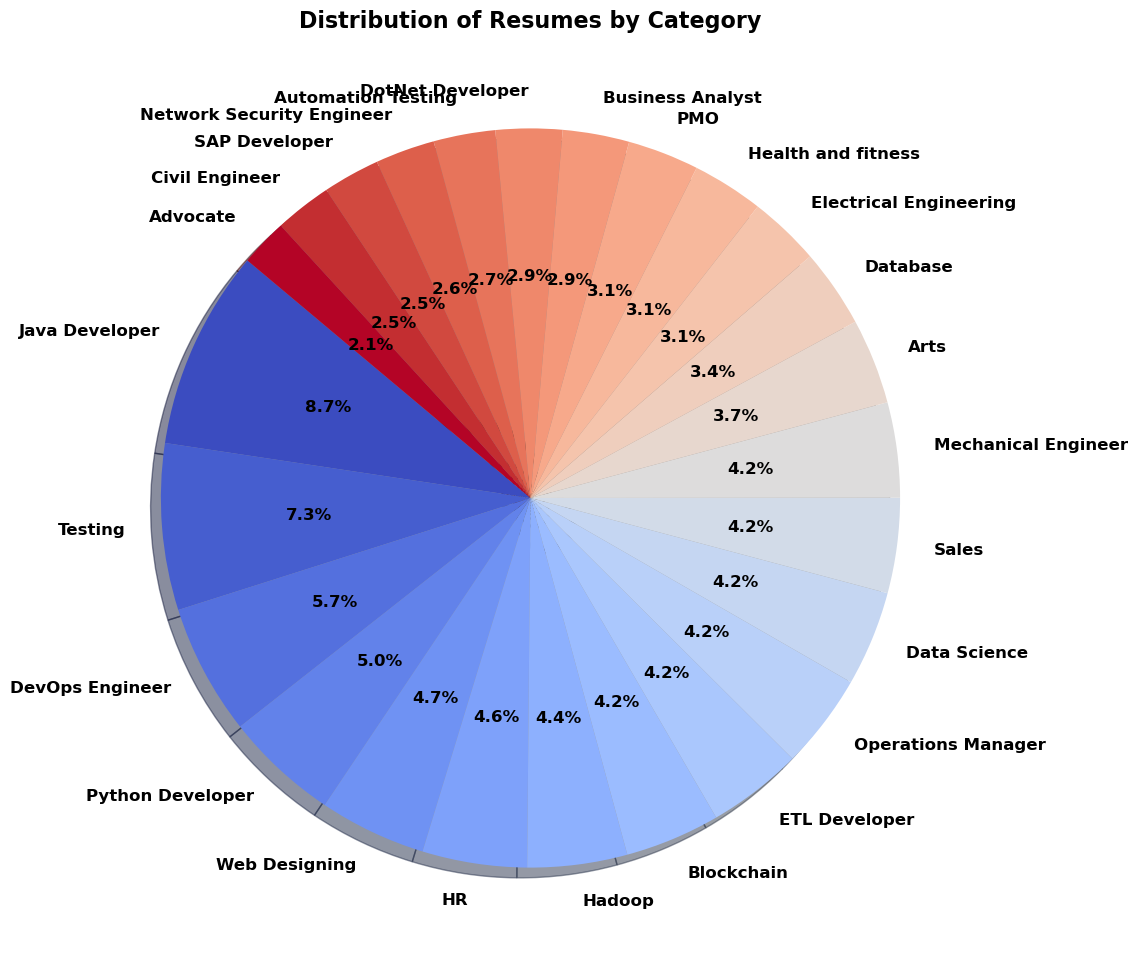

In [59]:

counts = df['Category'].value_counts()
labels = counts.index

# Using a colormap (e.g., 'coolwarm') to generate colors
cmap = plt.get_cmap("coolwarm")
colors = cmap(np.linspace(0, 1, len(labels)))  # Create as many colors as categories

plt.figure(figsize=(12,12))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',      # Show percentage
    colors=colors,
    startangle=140,          # Rotate start
    shadow=True,             # Add shadow
    textprops={'fontsize':12, 'fontweight':'bold'}  # Bold labels
)

plt.title("Distribution of Resumes by Category", fontsize=16, fontweight='bold')
plt.show()


In [60]:
df['Category'][0]

'Data Science'

In [61]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [62]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('@\S+\s', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('@\S+', ' ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    
    return cleanText

In [63]:
cleanResume("my ######## #noorsaed website link is this http://helloworld and access it @gmail.com " )

'my website link is this and a ess it '

In [64]:
df['Resume']= df['Resume'].apply(lambda x: cleanResume(x))

In [65]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [68]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [69]:
#['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#      'Mechanical Engineer', 'Sales', 'Health and fitness',
#       'Civil Engineer', 'Java Developer', 'Business Analyst',
#      'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#       'Operations Manager', 'Python Developer', 'DevOps Engineer',
#       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#      dtype=object)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

# Fit the vectorizer
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])


In [71]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [73]:
requiredText

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164261 stored elements and shape (962, 7351)>

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [49]:
X_train.shape

(769, 7351)

In [50]:
X_test.shape

(193, 7351)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn. multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

print(accuracy_score(y_test,ypred))

0.9844559585492227


In [76]:
myresume = """ I am a data scientist specializing in Machine Learning, Deep Learning, and Computer Vision, with a strong foundation in mathematics, statistics, and programming. I am passionate about uncovering hidden patterns in 
data and transforming them into meaningful insights that drive innovation.
I have hands-on experience in developing predictive models, implementing deep learning algorithms, and designing intelligent computer vision systems. My technical expertise includes Python, Scikit-learn, TensorFlow, and PyTorch.
What sets me apart is my ability to clearly communicate complex technical concepts to diverse audiences. I excel at converting technical insights into actionable recommendations that support informed, data-driven decision-making.
If you're looking for a dedicated and versatile data scientist to collaborate on impactful projects, I am eager to contribute my expertise and help build intelligent solutions that make a difference.
---WORK EXPERIENCE I am a versatile data scientist with experience across multiple AI-focused domains, including:
Machine Learning, Deep Learning, Computer Vision, Recommendation Systems, Data Visualization. I have successfully developed and deployed machine learning models to solve complex problems and support strategic decision-making processes.
---SKILL Machine Learning Deep Learning Computer Vision Recommendation Systems Data Visualization Programming Languages (Python, SQL) Data Preprocessing & Feature Engineering Model Evaluation & Deployment Statistical Analysis Communication & Collaboration
---LANGUAGES English Sinhala Tamil---CONTACT & SOURCES Email: dhanushhiatus019@gmail.com Phone: 0778947790 GitHub: https://github.com/dhanushiatus/ LinkedIn: https://www.linkedin.com/in/jagapathy-dhanushkar-1bab77248 Portfolio: https://dhanushiatus.lovable.app/
  """

In [75]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [80]:
import pickle

# Load trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Load TF-IDF vectorizer (IMPORTANT if saved separately)
tfidf = pickle.load(open('tfidf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TF-IDF Vectorizer
input_features = tfidf.transform([cleaned_resume])

# Make prediction using loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category id to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and Fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "Dotnet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate"
}

# Print prediction

category_name = category_mapping.get(prediction_id, "Unknown")
print("Predicted Category:", category_name)
print("Predicted Category ID:", prediction_id)

Predicted Category: Data Science
Predicted Category ID: 6
